In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from skopt.space import Categorical
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [2]:
#load data
train = pd.DataFrame(pd.read_csv('./input/train.csv'))
test = pd.DataFrame(pd.read_csv('./input/test.csv'))
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,Cash loans,F,N,N,0,112500.0,755190.0,36328.5,...,NaN,0.0,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN
1,1,0,Cash loans,F,N,Y,0,225000.0,585000.0,16893.0,...,0.553165,0.0,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0
2,2,0,Cash loans,F,N,Y,0,54000.0,334152.0,18256.5,...,NaN,4.0,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN
3,3,0,Cash loans,F,N,Y,0,67500.0,152820.0,8901.0,...,0.767523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,Cash loans,M,N,N,0,157500.0,271066.5,21546.0,...,0.669057,0.0,0.0,0.0,0.0,-1243.0,0.0,0.0,0.0,4.0


In [3]:
train.isna().sum()[train.isna().sum()==0]

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATI

In [4]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,171202,Cash loans,F,N,N,1,144000.0,961146.0,28233.0,688500.0,...,NaN,2.0,0.0,2.0,0.0,-1.0,NaN,NaN,NaN,NaN
1,171203,Cash loans,F,N,N,0,103500.0,296280.0,16069.5,225000.0,...,NaN,5.0,0.0,5.0,0.0,-212.0,NaN,NaN,NaN,NaN
2,171204,Cash loans,F,N,Y,1,180000.0,183694.5,11236.5,139500.0,...,0.389339,7.0,0.0,7.0,0.0,-428.0,0.0,1.0,1.0,1.0
3,171205,Revolving loans,F,N,Y,2,225000.0,450000.0,22500.0,450000.0,...,0.217629,2.0,0.0,2.0,0.0,-442.0,0.0,0.0,0.0,3.0
4,171206,Cash loans,F,Y,Y,2,144000.0,545040.0,26640.0,450000.0,...,NaN,2.0,0.0,2.0,0.0,-1333.0,0.0,0.0,0.0,3.0


# LightGBM

In [28]:
train_g, test_g = train.copy(), test.copy()
print(f'shape of train_g is {train_g.shape}')
print(f'shape of test_g is {test_g.shape}')

shape of train_g is (171202, 51)
shape of test_g is (61500, 50)


In [29]:
train_g.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [30]:
def to_category(df):
    changed = []
    for col1 in df.columns:
        if df[col1].dtype == 'object':
            df[col1] = df[col1].astype('category')
            changed.append(col1)
    return changed

In [31]:
to_category(train_g)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [37]:
category_f = ['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [32]:
to_category(test_g)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [33]:
X, y = train_g.drop('TARGET', axis = 1), train_g['TARGET']

In [36]:
X_train_lgbm, X_valid_lgbm, y_train_lgbm, y_valid_lgbm = train_test_split(
    X, y, random_state = 42, test_size = 0.2
)

In [66]:
y_train_lgbm[y_train_lgbm==1]

42036     1
98268     1
157689    1
127458    1
39343     1
         ..
84654     1
130608    1
59735     1
126324    1
54886     1
Name: TARGET, Length: 11021, dtype: int64

In [50]:
train_data = lgb.Dataset(X_train_lgbm, label=y_train_lgbm, categorical_feature=category_f,free_raw_data=False)
test_data = lgb.Dataset(X_valid_lgbm, label=y_valid_lgbm, categorical_feature=category_f, reference=train_data,free_raw_data=False)

In [76]:
params = {
    'objective': 'binary',      # 二分类问题
    'metric': 'auc',   # 二分类错误率
    'boosting_type': 'gbdt',    # 基于梯度的决策树
    'num_leaves': 31,           # 树的叶子数
    'learning_rate': 0.08,      # 学习率
    'feature_fraction': 1.0,   # 特征选择的比例
    'bagging_fraction': 1.0,    # 随机选择数据的比例
    'bagging_freq': 5,          # 多少次迭代进行一次bagging
    'max_depth': -1,             # 最大深度
    'early_stopping_round': 10,
}

In [77]:
# 训练模型
num_round = 200  # 训练轮数
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Info] Number of positive: 11021, number of negative: 125940
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3639
[LightGBM] [Info] Number of data points in the train set: 136961, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080468 -> initscore=-2.436003
[LightGBM] [Info] Start training from score -2.436003
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.754561


In [43]:
?lgb.train

Signature:
lgb.train(
    params: Dict[str, Any],
    train_set: lightgbm.basic.Dataset,
    num_boost_round: int = 100,
    valid_sets: Optional[List[lightgbm.basic.Dataset]] = None,
    valid_names: Optional[List[str]] = None,
    feval: Union[Callable[[numpy.ndarray, lightgbm.basic.Dataset], Tuple[str, float, bool]], Callable[[numpy.ndarray, lightgbm.basic.Dataset], List[Tuple[str, float, bool]]], List[Union[Callable[[numpy.ndarray, lightgbm.basic.Dataset], Tuple[str, float, bool]], Callable[[numpy.ndarray, lightgbm.basic.Dataset], List[Tuple[str, float, bool]]]]], NoneType] = None,
    init_model: Union[str, pathlib.Path, lightgbm.basic.Booster, NoneType] = None,
    feature_name: Union[List[str], ForwardRef("Literal['auto']")] = 'auto',
    categorical_feature: Union[List[str], List[int], ForwardRef("Literal['auto']")] = 'auto',
    keep_training_booster: bool = False,
    callbacks: Optional[List[Callable]] = None,
) -> lightgbm.basic.Booster
Docstring:
Perform the training with 

# Naive Feature using

**check the object data in train and test data**

In [4]:
#select the columns whose dtypes is object
t1 = train.select_dtypes('object')
#count the number of unique values
print(f'the object types in train {t1.apply(pd.Series.nunique, axis = 0)}\n')
t2 = test.select_dtypes('object')
print(f'the object types in test {t2.apply(pd.Series.nunique, axis = 0)}\n')

the object types in train NAME_CONTRACT_TYPE      2
CODE_GENDER             3
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      6
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        18
ORGANIZATION_TYPE      58
dtype: int64

the object types in test NAME_CONTRACT_TYPE      2
CODE_GENDER             2
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        18
ORGANIZATION_TYPE      58
dtype: int64



In [135]:
train['CODE_GENDER'].value_counts()

CODE_GENDER
F      112549
M       58649
XNA         4
Name: count, dtype: int64

**see the name family status**

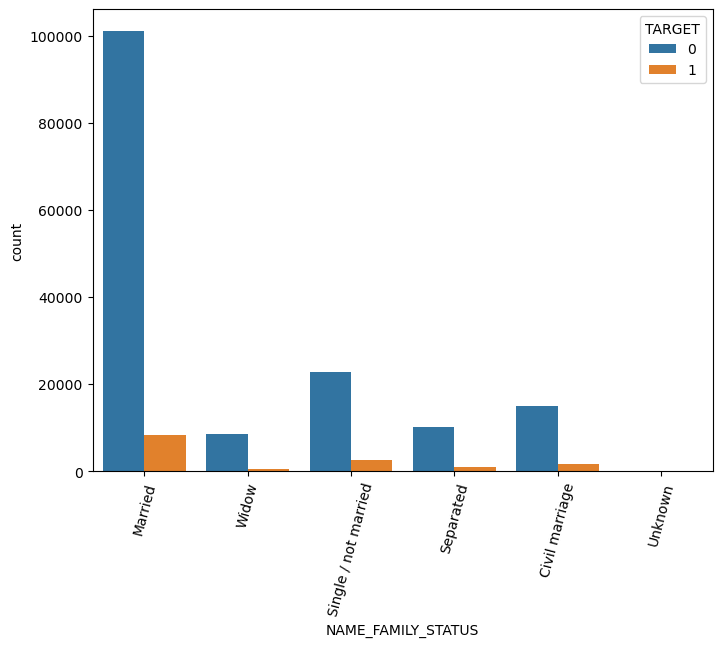

In [6]:
fig, ax = plt.subplots(figsize = (8,6))

sns.countplot(data=train, x='NAME_FAMILY_STATUS', hue='TARGET', ax=ax)

plt.xticks(rotation = 75)
plt.show()

In [7]:
#see unknown number
print(f"the values in n_train is {train['NAME_FAMILY_STATUS'].value_counts()}\n")
print(f"the values in n_test is {test['NAME_FAMILY_STATUS'].value_counts()}\n")

the values in n_train is NAME_FAMILY_STATUS
Married                 109323
Single / not married     25285
Civil marriage           16652
Separated                10988
Widow                     8952
Unknown                      2
Name: count, dtype: int64

the values in n_test is NAME_FAMILY_STATUS
Married                 38946
Single / not married     9334
Civil marriage           6098
Separated                4008
Widow                    3114
Name: count, dtype: int64



In [9]:
#check the rario
def default_ratio(df, col):
    default_nums = df.groupby(col)['TARGET'].sum()
    series = df[col].value_counts()
    return default_nums / series

In [10]:
print(f"default ratio of NAME_INCOME_TYPE in n_train is: \n{default_ratio(train, 'NAME_FAMILY_STATUS')}\n")

default ratio of NAME_INCOME_TYPE in n_train is: 
NAME_FAMILY_STATUS
Civil marriage          0.098727
Married                 0.075565
Separated               0.082727
Single / not married    0.098556
Unknown                 0.000000
Widow                   0.057529
dtype: float64



**see if the shape is the same**

**check the 'NAME_TYPE_SUITE'**

In [61]:
n_train['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      138442
Family              22355
Spouse, partner      6288
Children             1775
Other_B               955
Other_A               492
Group of people       144
Name: count, dtype: int64

In [63]:
n_test['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      49771
Family              7860
Spouse, partner     2348
Children             671
Other_B              359
Other_A              185
Group of people       58
Name: count, dtype: int64

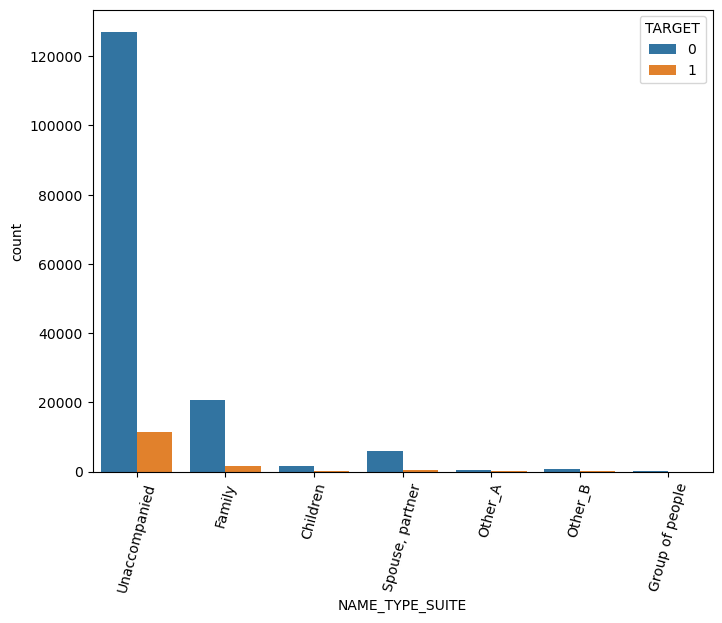

In [66]:
fig, ax = plt.subplots(figsize = (8,6))

sns.countplot(data=n_train, x='NAME_TYPE_SUITE', hue='TARGET', ax=ax)

plt.xticks(rotation = 75)
plt.show()

**check the NAME_INCOME_TYPE**

In [68]:
n_train['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 88265
Commercial associate    40004
Pensioner               30895
State servant           12007
Unemployed                 10
Student                     9
Businessman                 3
Maternity leave             3
Name: count, dtype: int64

In [69]:
n_test['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 32460
Commercial associate    14253
Pensioner               10560
State servant            4215
Unemployed                  6
Student                     4
Maternity leave             1
Businessman                 1
Name: count, dtype: int64

In [72]:
default_nums = n_train.groupby('NAME_INCOME_TYPE')['TARGET'].sum()
default_nums

NAME_INCOME_TYPE
Businessman                0
Commercial associate    3009
Maternity leave            1
Pensioner               1674
State servant            707
Student                    0
Unemployed                 2
Working                 8428
Name: TARGET, dtype: int64

In [81]:
print(f"default ratio of NAME_INCOME_TYPE in n_train is: \n{default_ratio(n_train, 'NAME_INCOME_TYPE')}\n")

default ratio of NAME_INCOME_TYPE in n_train is: 
NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.075217
Maternity leave         0.333333
Pensioner               0.054184
State servant           0.058882
Student                 0.000000
Unemployed              0.200000
Working                 0.095485
dtype: float64



**NAME_EDUCATION_TYPE**

In [10]:
print(f"default ratio of NAME_INCOME_TYPE in n_train is: \n{default_ratio(n_train, 'NAME_EDUCATION_TYPE')}\n")

default ratio of NAME_INCOME_TYPE in n_train is: 
NAME_EDUCATION_TYPE
Academic degree                  0.009901
Higher education                 0.053694
Incomplete higher                0.087215
Lower secondary                  0.110694
Secondary / secondary special    0.089220
dtype: float64



**NAME_HOUSING_TYPE**

In [11]:
print(f"default ratio of NAME_INCOME_TYPE in n_train is: \n{default_ratio(n_train, 'NAME_HOUSING_TYPE')}\n")

default ratio of NAME_INCOME_TYPE in n_train is: 
NAME_HOUSING_TYPE
Co-op apartment        0.085484
House / apartment      0.077841
Municipal apartment    0.083561
Office apartment       0.065097
Rented apartment       0.129481
With parents           0.117996
dtype: float64



**OCCUPATION_TYPE**

In [84]:
print(f"default ratio of NAME_INCOME_TYPE in n_train is: \n{default_ratio(n_train, 'OCCUPATION_TYPE')}\n")

default ratio of NAME_INCOME_TYPE in n_train is: 
OCCUPATION_TYPE
Accountants              0.046140
Cleaning staff           0.094663
Cooking staff            0.103788
Core staff               0.063589
Drivers                  0.117357
HR staff                 0.071197
High skill tech staff    0.060141
IT staff                 0.071895
Laborers                 0.103994
Low-skill Laborers       0.162489
Managers                 0.061245
Medicine staff           0.066400
Private service staff    0.068634
Realty agents            0.074519
Sales staff              0.096386
Secretaries              0.082677
Security staff           0.109542
Waiters/barmen staff     0.128514
dtype: float64



### **处理异常和nan值**

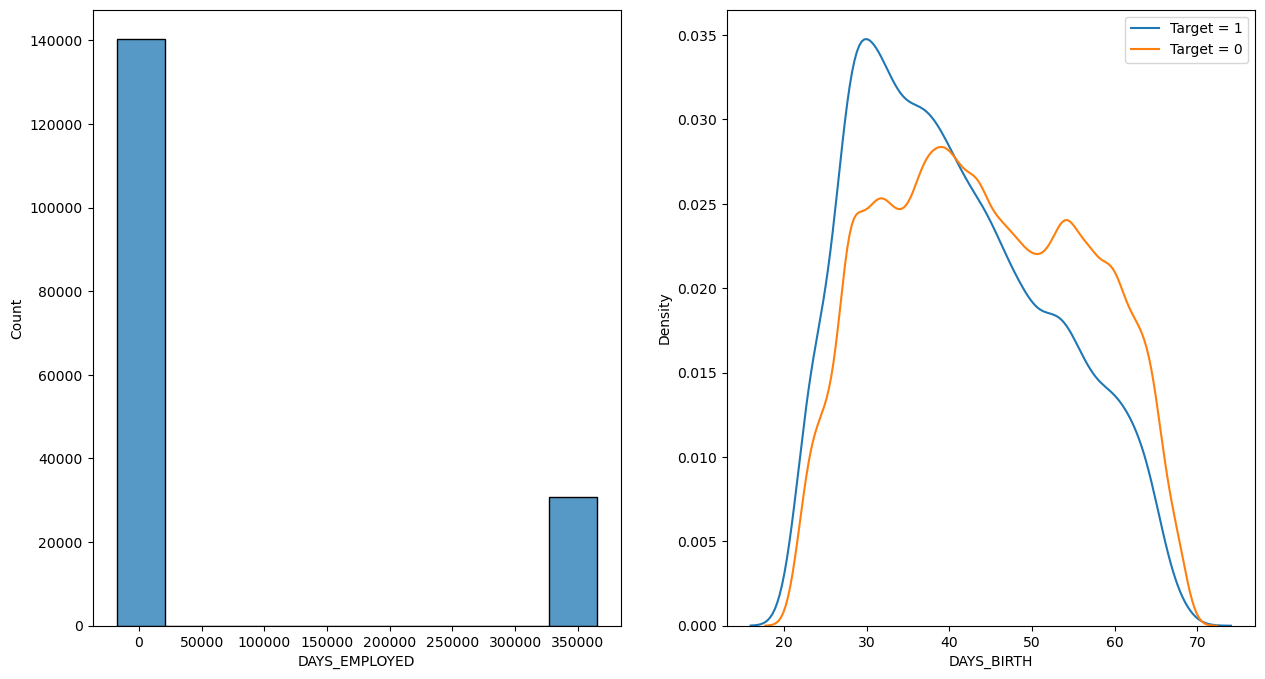

In [214]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.histplot(data=train, x='DAYS_EMPLOYED', bins = 10, ax=ax1)

sns.kdeplot(data=train.loc[train['TARGET']==1, 'DAYS_BIRTH']/-365, label = 'Target = 1', ax=ax2)
sns.kdeplot(data=train.loc[train['TARGET']==0, 'DAYS_BIRTH']/-365, label = 'Target = 0', ax=ax2)

plt.legend()
plt.show()

In [11]:
train.isna().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                    34241
FLAG_OWN_REALTY                 34241
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         6
AMT_GOODS_PRICE                   163
NAME_TYPE_SUITE                   747
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    112992
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [18]:
test.isna().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                   12334
FLAG_OWN_REALTY                12334
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        3
AMT_GOODS_PRICE                   53
NAME_TYPE_SUITE                  248
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                    40909
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

**check amt annuity**

In [12]:
train[train['AMT_ANNUITY'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12203,12203,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0.452534,1.0,0.0,1.0,0.0,-199.0,0.0,1.0,0.0,1.0
21815,21815,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0.177704,0.0,0.0,0.0,0.0,-743.0,0.0,0.0,0.0,6.0
50207,50207,0,Cash loans,F,N,Y,0,157500.0,792000.0,NaN,...,0.651260,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,1.0,1.0
134001,134001,0,Cash loans,F,NaN,NaN,0,315000.0,628069.5,NaN,...,NaN,1.0,0.0,1.0,0.0,-1255.0,0.0,0.0,0.0,2.0
165603,165603,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0.372334,1.0,0.0,1.0,0.0,-2.0,0.0,0.0,1.0,1.0
168512,168512,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,NaN,0.0,0.0,0.0,0.0,-295.0,0.0,1.0,0.0,2.0


In [13]:
train[train['CNT_FAM_MEMBERS'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47453,47453,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,...,0.670652,1.0,0.0,1.0,0.0,-654.0,0.0,0.0,0.0,1.0
74592,74592,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,...,NaN,3.0,0.0,3.0,0.0,-876.0,NaN,NaN,NaN,NaN


## Feature engineering

In [4]:
n_train, n_test = train.copy(), test.copy()

In [5]:
n_train = n_train.dropna(subset = ['CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'])

In [7]:
#drop the nan in code gende
n_train = n_train[n_train['CODE_GENDER'] != 'XNA']
#drop the unknown values
n_train = n_train[n_train['NAME_FAMILY_STATUS'] != 'Unknown']
n_train.shape

(171195, 51)

In [8]:
print(f'shape of n_train is {n_train.shape}')
print(f'\n shape of n_train is {n_test.shape}')

shape of n_train is (171195, 51)

 shape of n_train is (61500, 50)


In [9]:
t3 = n_train.select_dtypes('object')
#count the number of unique values
print(f'the object types in train: \n {t3.apply(pd.Series.nunique, axis = 0)}\n')
t4 = n_test.select_dtypes('object')
print(f'the object types in test: \n {t4.apply(pd.Series.nunique, axis = 0)}\n')

the object types in train: 
 NAME_CONTRACT_TYPE      2
CODE_GENDER             2
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        18
ORGANIZATION_TYPE      58
dtype: int64

the object types in test: 
 NAME_CONTRACT_TYPE      2
CODE_GENDER             2
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        18
ORGANIZATION_TYPE      58
dtype: int64



In [10]:
n_test['DAYS_EMPLOYED'] = n_test['DAYS_EMPLOYED'].replace(365243, np.nan)
n_train['DAYS_EMPLOYED'] = n_train['DAYS_EMPLOYED'].replace(365243, np.nan)

In [11]:
#encoding
#encoding need to fill NaN: for le->'null', for dummies->dummy_na = True
def encoding(df):
    encoded_f = []
    le = LabelEncoder()
    obj_f = df.columns[df.dtypes == 'object']
    lb_count, oh_count = 0, 0
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
    for col in obj_f:
        #label encoding
        if df[col].nunique()<=2:
            df[col] = le.fit_transform(df[col].fillna('NULL'))
            encoded_f.append(col)
            lb_count+= 1
        else:
        #one hot encodign
            df = pd.get_dummies(df, dtype = int, columns = [col])
            encoded_f.append(col)
            oh_count += 1
    return df, encoded_f, lb_count, oh_count

In [12]:
n_train, _ , lb, oh= encoding(n_train)
n_train.shape
print(f'{lb} features is label encoded \n')
print(f'{oh} features is onehot encoded')

4 features is label encoded 

7 features is onehot encoded


In [13]:
n_train.shape

(171195, 151)

In [14]:
n_test, _ , lb, oh= encoding(n_test)
print(f'shape of n_test is {n_test.shape}')
print(f'{lb} features is label encoded \n')
print(f'{oh} features is onehot encoded')

shape of n_test is (61500, 150)
4 features is label encoded 

7 features is onehot encoded


In [15]:
target = n_train['TARGET']
n_train = n_train.drop(columns = ['TARGET'])
print(f'shape of train data{n_train.shape}')
print(f'\n shape of test data{n_test.shape}')

shape of train data(171195, 150)

 shape of test data(61500, 150)


In [16]:
n_train['CREDIT_INCOME_PERCENT'] = n_train['AMT_CREDIT'] / n_train['AMT_INCOME_TOTAL']
n_train['ANNUITY_INCOME_PERCENT'] = n_train['AMT_ANNUITY'] / n_train['AMT_INCOME_TOTAL']
n_train['CREDIT_TERM'] = n_train['AMT_ANNUITY'] / n_train['AMT_CREDIT']
n_train['DAYS_EMPLOYED_PERCENT'] =n_train['DAYS_EMPLOYED'] / n_train['DAYS_BIRTH']

In [17]:
n_train['OWN_CAR_AGE_PERCENT'] = n_train['OWN_CAR_AGE'] / n_train['DAYS_BIRTH']
n_train['PERSONAL_MON_PERCENT'] = n_train['AMT_ANNUITY'] / n_train['CNT_FAM_MEMBERS']

In [18]:
n_test['CREDIT_INCOME_PERCENT'] = n_test['AMT_CREDIT'] / n_test['AMT_INCOME_TOTAL']
n_test['ANNUITY_INCOME_PERCENT'] = n_test['AMT_ANNUITY'] / n_test['AMT_INCOME_TOTAL']
n_test['CREDIT_TERM'] = n_test['AMT_ANNUITY'] / n_test['AMT_CREDIT']
n_test['DAYS_EMPLOYED_PERCENT'] = n_test['DAYS_EMPLOYED'] / n_test['DAYS_BIRTH']

In [19]:
n_test['OWN_CAR_AGE_PERCENT'] = n_test['OWN_CAR_AGE'] / n_test['DAYS_BIRTH']
n_test['PERSONAL_MON_PERCENT'] = n_test['AMT_ANNUITY'] / n_test['CNT_FAM_MEMBERS']

In [20]:
n_train.shape

(171195, 156)

In [21]:
n_test.shape

(61500, 156)

In [129]:
train[train['TARGET']==0].shape[0]/train[train['TARGET']==1].shape[0]

11.38709210621518

In [22]:
#split
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(
    n_train, target, test_size = 0.3, stratify = target, random_state = 0
)

In [177]:
#hyperparameters searching
from sklearn.model_selection import GridSearchCV
xgb1 = XGBClassifier()

# 定义超参数网格
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [800, 900, 1000, 1100],
    'gamma': [0.1,0.2],
    'scale_pos_weight' : [11.38709]
}

# 
grid_search = GridSearchCV(
    estimator=xgb1,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3
)

# 
grid_search.fit(X_train1, y_train1)

# 
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

Best Parameters: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 800, 'scale_pos_weight': 11.38709}
Best AUC Score: 0.7567757120425984


In [67]:
xgb1 = XGBClassifier(
learning_rate = 0.05, max_depth = 3, n_estimators = 800
)

xgb1.fit(X_train1, y_train1)

pred_train1 = xgb1.predict_proba(X_train1)[:, 1]
pred_valid1 = xgb1.predict_proba(X_valid1)[:, 1]

print(f'AUC on train is {roc_auc_score(y_train1, pred_train1)}')
print(f'AUC on valid is {roc_auc_score(y_valid1, pred_valid1)}')

AUC on train is 0.8014808825616685
AUC on valid is 0.7569714287302357


### Percentile selection

In [98]:
X_train_per, X_valid_per, y_train_per, y_valid_per = train_test_split(
    n_train, target, stratify = target, random_state = 42, test_size = 0.25
)

In [100]:
xgb_per = XGBClassifier(
learning_rate = 0.05, max_depth = 3, n_estimators = 800
)

xgb_per.fit(X_train_per, y_train_per)

pred_train_per = xgb_per.predict_proba(X_train_per)[:,1]
pred_valid_per = xgb_per.predict_proba(X_valid_per)[:,1]

print(f'auc on train set is: {roc_auc_score(y_train_per, pred_train_per)}')
print(f'auc on valid set is: {roc_auc_score(y_valid_per, pred_valid_per)}')

auc on train set is: 0.7995129575016073
auc on valid set is: 0.7543652956239197


**feature selection**

In [101]:
from sklearn import feature_selection

In [102]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile = 20)
#feature selection
X_train_20 = fs.fit_transform(X_train_per, y_train_per)
#fit model
xgb_per.fit(X_train_20, y_train)
#transform valid and test data
X_valid_20 = fs.transform(X_valid_per)
#predict on valid_20
pred_valid_20 = xgb_per.predict_proba(X_valid_20)[:,1]
#print
print(f'auc on valid set is: {roc_auc_score(y_valid_per, pred_valid_20)}')

ValueError: Input X contains NaN.
SelectPercentile does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Feature_importance selected model has same performance

In [31]:
importance = xgb1.feature_importances_
importance

array([0.00521238, 0.03844498, 0.0296435 , 0.00494631, 0.00794937,
       0.00705768, 0.00531078, 0.01078011, 0.01081492, 0.01346411,
       0.00511424, 0.01115877, 0.02578983, 0.00608304, 0.00851038,
       0.01406708, 0.        , 0.        , 0.00557964, 0.00164857,
       0.00354274, 0.        , 0.00504034, 0.0061427 , 0.01131339,
       0.0039514 , 0.00490779, 0.00490605, 0.01122049, 0.00638473,
       0.00347536, 0.01704644, 0.07354284, 0.05544398, 0.00465313,
       0.0166037 , 0.00616885, 0.00622708, 0.00825607, 0.00737981,
       0.00380024, 0.0062764 , 0.00674044, 0.        , 0.00633871,
       0.00182285, 0.        , 0.00660964, 0.00632104, 0.00372396,
       0.        , 0.00386164, 0.        , 0.        , 0.00892225,
       0.        , 0.        , 0.02074287, 0.00198766, 0.08114925,
       0.00603073, 0.00463365, 0.01264402, 0.00631206, 0.01137121,
       0.00579631, 0.00722498, 0.00557899, 0.00459988, 0.00897038,
       0.00555269, 0.00600974, 0.00514565, 0.00680004, 0.00548

In [39]:
importance_series = pd.DataFrame(data = {'col1': list(n_train.columns), 'col2': importance})

In [42]:
importance_series.sort_values(by='col2', ascending=False, inplace=True)
importance_series

,col1,col2
59,NAME_EDUCATION_TYPE_Higher education,0.081149
32,EXT_SOURCE_2,0.073543
33,EXT_SOURCE_3,0.055444
1,NAME_CONTRACT_TYPE,0.038445
2,CODE_GENDER,0.029643
...,...,...
111,ORGANIZATION_TYPE_Industry: type 2,0.000000
115,ORGANIZATION_TYPE_Industry: type 6,0.000000
117,ORGANIZATION_TYPE_Industry: type 8,0.000000
119,ORGANIZATION_TYPE_Insurance,0.000000


In [51]:
importance_series[importance_series['col2']>0].col1

59         NAME_EDUCATION_TYPE_Higher education
32                                 EXT_SOURCE_2
33                                 EXT_SOURCE_3
1                            NAME_CONTRACT_TYPE
2                                   CODE_GENDER
                         ...                   
85               OCCUPATION_TYPE_Medicine staff
89                  OCCUPATION_TYPE_Secretaries
121            ORGANIZATION_TYPE_Legal Services
96     ORGANIZATION_TYPE_Business Entity Type 2
101               ORGANIZATION_TYPE_Electricity
Name: col1, Length: 117, dtype: object

In [111]:
X_train_dp.shape

(128396, 20)

In [113]:
#try different percentage of features
ts_dp, vs_dp = [], []#train score and valid score on different percentage of features
for s in range(20, 116, 5):
    #use the feature importance produced by xgb1, which is trained on n_train
    features = list(importance_series[importance_series['col2']>0].col1)[:s]
    train_different_per = n_train.copy()[features]
    #split
    X_train_dp, X_valid_dp, y_train_dp, y_valid_dp = train_test_split(
        train_different_per, target, test_size = 0.25, stratify = target, random_state = 42
    )
    xgb_dp=XGBClassifier(
    learning_rate = 0.1, 
    max_depth = 3, 
    n_estimators = 550, 
    gamma=0.5, 
    reg_lambda =0,
    objective = 'binary:logistic',
    eval_metric = 'auc',
    scale_pos_weight = 1,
    min_child_weight = 3
    )
    
    xgb_dp.fit(X_train_dp, y_train_dp)
    #produce score
    ts_dp.append(roc_auc_score(y_train_dp, xgb_dp.predict_proba(X_train_dp)[:, 1]))
    vs_dp.append(roc_auc_score(y_valid_dp, xgb_dp.predict_proba(X_valid_dp)[:, 1]))

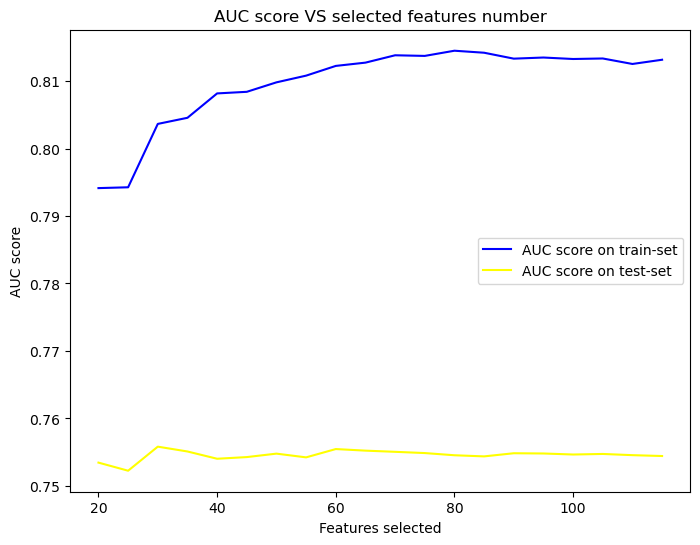

In [140]:
fig, ax = plt.subplots(figsize = (8,6))

x = [s for s in range(20, 116, 5)]

ax.plot(x, ts_dp, label = 'AUC score on train-set', color = 'blue')
ax.plot(x, vs_dp, label = 'AUC score on test-set', color = 'yellow')

ax.set_title('AUC score VS selected features number')
ax.set_xlabel('Features selected')
ax.set_ylabel('AUC score')
ax.legend()

plt.show()

In [117]:
vs_dp.index(max(vs_dp))

2

In [123]:
X_train_25, X_valid_25, y_train_25, y_valid_25 = train_test_split(
    train_different_per, target, test_size = 0.25, stratify = target, random_state = 42
)

xgb_25=XGBClassifier(
learning_rate = 0.1, 
max_depth = 3, 
n_estimators = 550, 
gamma=0.1, 
reg_lambda =0,
objective = 'binary:logistic',
eval_metric = 'auc',
scale_pos_weight = 1,
min_child_weight = 3
)

xgb_25.fit(X_train_25, y_train_25)

print(f'score on train set by 25 features:{roc_auc_score(y_train_25, xgb_25.predict_proba(X_train_25)[:, 1])}')
print(f'score on train set by 25 features:{roc_auc_score(y_valid_25, xgb_25.predict_proba(X_valid_25)[:, 1])}')

score on train set by 25 features:0.8132176362746131
score on train set by 25 features:0.7545468145016769


In [105]:
l = list(importance_series[importance_series['col2']>0].col1)[:100]
len(l)

100

In [106]:
s_train, s_test = n_train.copy()[l], n_test.copy()[l]

X_train_sel, X_valid_sel, y_train_sel, y_valid_sel = train_test_split(
    s_train, target, test_size = 0.3, stratify = target, random_state = 42
)

In [81]:
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.06, 0.1, 0.15],
    'n_estimators': [600, 750,900],
    'gamma': [0.1,0.2],
    'alpha': [0.1, 0.2],
    'lambda': [0.5],
    # 'subsample':[0, 0.1,0.5,1],
    'scale_pos_weight' : [11.38709],
    
    'objective':['binary:logistic'],
    'eval_metric':['auc']
}

# 
grid_search = GridSearchCV(
    estimator=xgb3,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3
)

# 
grid_search.fit(X_train_sel, y_train_sel)

# 
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

Best Parameters: {'alpha': 0.1, 'eval_metric': 'auc', 'gamma': 0.2, 'lambda': 0.5, 'learning_rate': 0.06, 'max_depth': 3, 'n_estimators': 600, 'objective': 'binary:logistic', 'scale_pos_weight': 11.38709}
Best AUC Score: 0.7553638007242952


In [124]:
xgb3 = XGBClassifier(
    learning_rate = 0.1, 
    max_depth = 3, 
    n_estimators = 550, 
    gamma=0.5, 
    reg_lambda =0,
    objective = 'binary:logistic',
    eval_metric = 'auc',
    scale_pos_weight = 1,
    min_child_weight = 3
)
xgb3.fit(X_train_sel, y_train_sel)

train_sel_pred = xgb3.predict_proba(X_train_sel)[:,1]
valid_sel_pred = xgb3.predict_proba(X_valid_sel)[:,1]

print(f'auc on train is {roc_auc_score(y_train_sel, train_sel_pred)}')
print(f'auc on valid is  {roc_auc_score(y_valid_sel, valid_sel_pred)}')

auc on train is 0.8158341677357501
auc on valid is  0.7573371109400656


In [125]:
pred_test = xgb3.predict_proba(s_test)[:, 1]

# COMP2-1

In [127]:
train_opu, test_opu = train.copy(), test.copy()

In [128]:
cols = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

#intance
le = LabelEncoder()

#encode
for col in cols:
    le.fit(train_opu[col])
    train_opu[col] = le.transform(train_opu[col])
    test_opu[col] = le.transform(test_opu[col])

print('\n the value set of NAME_CONTRACT _TYPE is {}'.format(set(train_opu['NAME_CONTRACT_TYPE'].values)))
print('\n the value set of FLAG_OWN_CAR is {}'.format(set(train_opu['FLAG_OWN_CAR'].values)))
print('\n the value set of FLAG_OWN_REALTY is {}'.format(set(train_opu['FLAG_OWN_REALTY'].values)))


 the value set of NAME_CONTRACT _TYPE is {0, 1}

 the value set of FLAG_OWN_CAR is {0, 1, 2}

 the value set of FLAG_OWN_REALTY is {0, 1, 2}


In [129]:
train_opu = pd.get_dummies(train_opu, dtype=float)
test_opu = pd.get_dummies(test_opu, dtype=float)
print(f'shape of train data{train_opu.shape}')
print(f'\n shape of test data{test_opu.shape}')

shape of train data(171202, 154)

 shape of test data(61500, 151)


In [130]:
t = train_opu['TARGET']

#align
train_opu, test_opu = train_opu.align(test_opu, join='inner', axis=1)

#add back
train_opu['TARGET'] = t

print(f'shape of train data{train_opu.shape}')
print(f'\n shape of test data{test_opu.shape}')

shape of train data(171202, 152)

 shape of test data(61500, 151)


In [131]:
train_opu['CREDIT_INCOME_PERCENT'] = train_opu['AMT_CREDIT'] / train_opu['AMT_INCOME_TOTAL']
train_opu['ANNUITY_INCOME_PERCENT'] = train_opu['AMT_ANNUITY'] / train_opu['AMT_INCOME_TOTAL']
train_opu['CREDIT_TERM'] = train_opu['AMT_ANNUITY'] / train_opu['AMT_CREDIT']
train_opu['DAYS_EMPLOYED_PERCENT'] = train_opu['DAYS_EMPLOYED'] / train_opu['DAYS_BIRTH']
test_opu['CREDIT_INCOME_PERCENT'] = test_opu['AMT_CREDIT'] / test_opu['AMT_INCOME_TOTAL']
test_opu['ANNUITY_INCOME_PERCENT'] = test_opu['AMT_ANNUITY'] / test_opu['AMT_INCOME_TOTAL']
test_opu['CREDIT_TERM'] = test_opu['AMT_ANNUITY'] / test_opu['AMT_CREDIT']
test_opu['DAYS_EMPLOYED_PERCENT'] =test_opu['DAYS_EMPLOYED'] / test_opu['DAYS_BIRTH']
test_opu['DAYS_EMPLOYED'] = test_opu['DAYS_EMPLOYED'].replace(365243, np.nan)
train_opu['DAYS_EMPLOYED'] = train_opu['DAYS_EMPLOYED'].replace(365243, np.nan)

In [132]:
y = train_opu.TARGET
X = train_opu.drop(columns = 'TARGET')

In [133]:
print(X.shape)
print(y.shape)

(171202, 155)
(171202,)


In [134]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(
    X, y, stratify = y, test_size = 0.3, random_state = 42
)

In [135]:
xgb2 = XGBClassifier()

# 定义超参数网格
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [700, 850, 1000],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}

# 
grid_search = GridSearchCV(
    estimator=xgb2,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3
)

# 
grid_search.fit(X_train2, y_train2)

# 
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

KeyboardInterrupt: 

In [136]:
#learning_rate = 0.06, max_depth = 3, n_estimators = 1000, gamma = 0.1->0.7622
xgb2 = XGBClassifier(learning_rate = 0.055, max_depth = 3, n_estimators = 1200)

xgb2.fit(X_train2, y_train2)

pred_train2 = xgb2.predict_proba(X_train2)[:, 1]
pred_valid2 = xgb2.predict_proba(X_valid2)[:, 1]

print(f'auc on train is {roc_auc_score(y_train2, pred_train2)})')
print(f'auc on train is {roc_auc_score(y_valid2, pred_valid2)})')

auc on train is 0.8183105190424167)
auc on train is 0.7622913810075012)


In [137]:
pred_test2 = xgb2.predict_proba(test_opu)[:,1]

In [138]:
pred = 0.4 * pred_test + 0.6 * pred_test2

In [139]:
sam = pd.read_csv('./input/sample_submission.csv')
sam['TARGET'] = pred
sam.to_csv('sub_merge1.csv', index=False)

# Pick features without NaN to make prediction

In [3]:
#nan in train and test
nan_feature_train = train.isna().any()
nan_feature_test = test.isna().any()

In [4]:
#pick the feature with no NaN included in training data
train_goodfea, train_nafea = [], []
for index, value in nan_feature_train.items():
    #if value is False, which means no NaN included
    if not value:
        train_goodfea.append(index)
    #value is true
    elif value:
        train_nafea.append(index)
        
print(f'the number of feature do no contain nan is {len(train_goodfea)}')
print(f'the number of feature do contain nan is {len(train_nafea)}')

the number of feature do no contain nan is 31
the number of feature do contain nan is 20


In [5]:
#pick the feature with no NaN included in testing data
test_goodfea, test_nafea = [], []
for index, value in nan_feature_test.items():
    #if value is False, which means no NaN included
    if not value:
        test_goodfea.append(index)
    #value is true
    elif value:
        test_nafea.append(index)
        
print(f'the number of feature do no contain nan is {len(test_goodfea)}')
print(f'the number of feature do contain nan is {len(test_nafea)}')

the number of feature do no contain nan is 32
the number of feature do contain nan is 18


In [6]:
s1 = set(np.array(train_goodfea))
s2 = set(np.array(test_goodfea))
print(f'{str(s2-s1)} has no nan in test data while has nan in train data')

{'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'} has no nan in test data while has nan in train data


In [7]:
s3 = s1 & s2
print(f'the number of shared features without nan is {len(list(s3))}')
print(f'\n {s3}')

the number of shared features without nan is 30

 {'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'FLAG_EMP_PHONE', 'DAYS_ID_PUBLISH', 'SK_ID_CURR', 'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'CODE_GENDER', 'DAYS_REGISTRATION', 'CNT_CHILDREN', 'FLAG_PHONE', 'NAME_FAMILY_STATUS', 'AMT_CREDIT', 'FLAG_CONT_MOBILE', 'REG_REGION_NOT_WORK_REGION', 'FLAG_MOBIL', 'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'LIVE_REGION_NOT_WORK_REGION', 'REGION_RATING_CLIENT', 'DAYS_EMPLOYED'}


In [8]:
contact = ['FLAG_PHONE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'FLAG_EMP_PHONE']

In [17]:
print(train_goodfea)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']


In [9]:
#pick the target
target = train['TARGET']

In [10]:
#pick these good features from test and train data
train_encoder = train[list(s3)]
test_encoder = test[list(s3)]

In [11]:
#check datatypes
train_encoder.dtypes.value_counts()

int64      19
object      7
float64     4
Name: count, dtype: int64

In [12]:
test_encoder.dtypes.value_counts()

int64      19
object      7
float64     4
Name: count, dtype: int64

In [25]:
train_encoder.shape[1]==test_encoder.shape[1]

True

In [13]:
#encode the label and categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#count how much is encoded
le_c, onehot_c = 0, 0 

for col in train_encoder:
    if train_encoder[col].dtype == 'object':
        #if types of label is less than 2
        if train_encoder[col].nunique()<=2:
            le.fit(train_encoder[col])
            train_encoder[col], test_encoder[col] = le.transform(train_encoder[col]), le.transform(test_encoder[col])
            le_c += 1
        #if types of label is more than 2
        else:
            train_encoder = pd.get_dummies(train_encoder, columns = [col], dtype = int)
            test_encoder = pd.get_dummies(test_encoder, columns = [col], dtype = int)
            onehot_c += 1
print(f'{le_c} features is label encoded')
print('\n {} features is one hot encoded'.format(onehot_c))

1 features is label encoded

 6 features is one hot encoded


## Use the encoded data `(train_enoded, test_encoded, target)` to train on models
The `(train_enoded, test_encoded, target)` data picked the shared features that include no `NaN` in both `train` and `test` dataset, and they are further encoded with label encodeing and one-hot encoding.

In [14]:
train_encoder.shape

(171202, 110)

In [15]:
test_encoder.shape

(61500, 108)

the shape is different, maybe due to one hot encoding. 2 catagories only appeared in train_encoder. 

In [16]:
#align
train_encoder, test_encoder = train_encoder.align(test_encoder, join='inner', axis=1)

In [17]:
print(train_encoder.shape)

(171202, 108)


**train test split**

In [18]:
X_train_xgb, X_valid_xgb, y_train_xgb, y_valid_xgb = train_test_split(
    train_encoder, target, test_size = 0.2, stratify = target, random_state = 42
)

In [19]:
print(f'shape of X_train_xgb is {X_train_xgb.shape}\n')
print(f'shape of y_train_xgb is {y_train_xgb.shape}')

shape of X_train_xgb is (136961, 108)

shape of y_train_xgb is (136961,)


#### XGBoost

In [87]:
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier()

# 定义超参数网格
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [250, 300, 350, 400]
}

# 
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3
)

# 
grid_search.fit(X_train_xgb, y_train_xgb)

# 
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

KeyboardInterrupt: 

In [89]:
#bayesian optim
# Define search space
search_space = {
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'n_estimators': Categorical([400,500,300])
}

# Create XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Perform Bayesian optimization
bayes_search = BayesSearchCV(estimator=xgb, search_spaces=search_space, n_iter=25, cv=3, n_jobs=1, verbose=2)
bayes_search.fit(X_train_xgb, y_train_xgb)

# Print best parameters
print(f"Best parameters: {bayes_search.best_params_}")
print(f"Best score: {bayes_search.best_score_}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END colsample_bytree=0.7552037744611002, learning_rate=0.02888752759463048, max_depth=3, n_estimators=500, subsample=0.7329554661349822; total time=   2.4s
[CV] END colsample_bytree=0.7552037744611002, learning_rate=0.02888752759463048, max_depth=3, n_estimators=500, subsample=0.7329554661349822; total time=   2.3s
[CV] END colsample_bytree=0.7552037744611002, learning_rate=0.02888752759463048, max_depth=3, n_estimators=500, subsample=0.7329554661349822; total time=   2.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END colsample_bytree=0.965723412046569, learning_rate=0.27534962639030297, max_depth=4, n_estimators=500, subsample=0.6667381337486429; total time=   2.6s
[CV] END colsample_bytree=0.965723412046569, learning_rate=0.27534962639030297, max_depth=4, n_estimators=500, subsample=0.6667381337486429; total time=   2.7s
[CV] END colsample_bytree=0.965723412046569, learning_rate=0.27534962639030297,

In [20]:
xgb = XGBClassifier(learning_rate = 0.15, max_depth = 3, n_estimators = 600, 
                   )

xgb.fit(X_train_xgb, y_train_xgb)

pred_train_xgb = xgb.predict_proba(X_train_xgb)[:, 1]
pred_valid_xgb = xgb.predict_proba(X_valid_xgb)[:, 1]

print(f'score on train set os {roc_auc_score(y_train_xgb, pred_train_xgb)}')
print(f'score on valid set os {roc_auc_score(y_valid_xgb, pred_valid_xgb)}')

score on train set os 0.7510789216664722
score on valid set os 0.6735852992516485


#### LinearRegression

In [21]:
#LR model data
X_train_lr, X_valid_lr, y_train_lr, y_valid_lr = X_train_xgb.copy(), X_valid_xgb.copy(), y_train_xgb.copy(), y_valid_xgb.copy()

In [22]:
X_train_lr.isna().sum()[X_train_lr.isna().sum() != 0]

Series([], dtype: int64)

In [26]:

model = LogisticRegression()
model.fit(X_train_lr, y_train_lr)

y_pred_valid = model.predict_proba(X_valid_lr)[:, 1]
y_pred_train = model.predict_proba(X_train_lr)[:, 1]

print("AUC on train set is {:.3f}".format(roc_auc_score(y_train_lr, y_pred_train)))
print("AUC on valid set is {:.3f}".format(roc_auc_score(y_valid_lr, y_pred_valid)))

AUC on train set is 0.617
AUC on valid set is 0.620


D:\Apps\miniconda3\envs\dl\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
merge_pred = (y_pred_valid + pred_valid_xgb)/2
print("AUC by merging on valid set is {:.3f}".format(roc_auc_score(y_valid_lr, merge_pred)))

AUC by merging on valid set is 0.668
